# Arabic poems classification

In [461]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Data reading

In [391]:
df_train = pd.read_csv("arabic poems\poems.csv")
df_test = pd.read_csv("arabic poems\\test.csv")

## general check

In [392]:
df_train.head()

,Title,Author,Category,Poem
0,هُنّئتَ بالعيدِ بل هُنّي بكَ العيدُ،,صفي الدين الحلي,العصر الأندلسي,هنءت بالعيد بل هني بك العيد فانت لجود بل ارث ...
1,يا بَديعَ الحُسنِ,المعتمد بن عباد,العصر الأندلسي,يا بديع الحسن والاح سان يا بدر الدياجي يا غزا...
2,وأوانس تدنو إذا اجتديت,الأبيوردي,العصر الأندلسي,وَأَوانِسٍ تَدنو إِذا اِجتَدِيَتْ بِحَديثها وَ...
3,حسبي رضاك من الدهر الذي عتبا,ابن دارج القسطلي,العصر الأندلسي,حسبي رضاك من الدهر الذي عتبا وجود كفيك لحظ ال...
4,ماذا يقول المادحو,ظافر الحداد,العصر الأندلسي,ماذا يقول المادحو نَ وأنت مُخترع الغَرائبْ أع...


In [393]:
df_train.shape

(25000, 4)

In [394]:
df_test.shape

(4887, 4)

In [395]:
df_train["Author"].nunique()

633

In [396]:
df_test["Author"].nunique()

626

In [397]:
print(df_train['Poem'].apply(lambda x: len(x.split(' '))).sum())

3355941


In [398]:
print(df_test['Poem'].apply(lambda x: len(x.split(' '))).sum())

660678


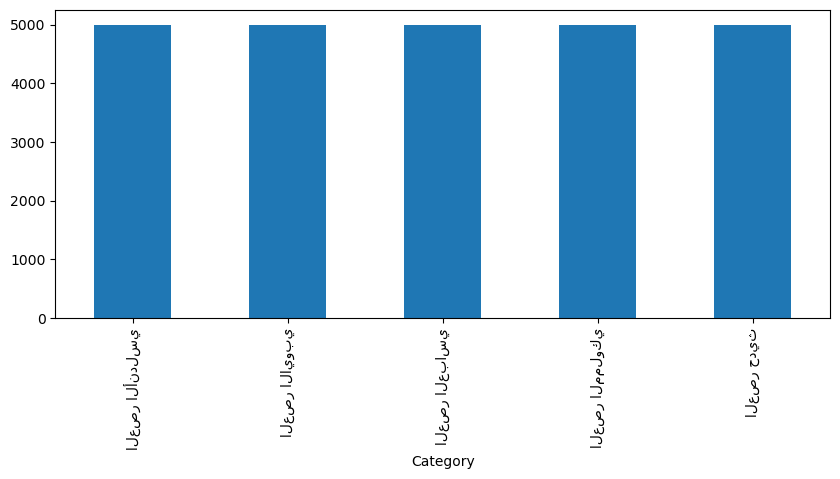

In [399]:
# my_tags = df["Category"].unique()
plt.figure(figsize=(10 ,4)) 
df_train.Category.value_counts().plot(kind='bar');

In [400]:
print(df_train["Poem"][100])

يُنادونَ قَلبي وَالغَرامُ يُجيبُ وَلِلقَلبِ في حين النِداءِ وَجيبُ مَشوقٌ دَعاهُ الشَوقُ وَالوَجدُ وَالهَوى يُجيبُ نِداءَ الحُبِّ وَهوَ نَجيبُ يُقاسي فُؤادي الوَجدَ وَالحُبَّ واصِلٌ فَكَيفَ تَراهُ إِن جَفاهُ حَبيبُ إِذا أخَطأَ الأَحبابُ تَرتيبَ حالِهِم فَإِنَّ فُؤادي دائما لَيُصيبُ عَليمٌ بِأَسرار الغَرامِ لأَنَّهُ بَصيرٌ بِأدواء الحِسانِ طَبيبُ يُواصِلُني سِرّا وَيُصرِمُ ظاهِراً وَذَلِكَ مِن أَفعالِهِنَّ عَجيبُ


## remove stop words from train and test data

In [401]:
import arabicstopwords.arabicstopwords as ast

In [402]:
stop_words = ast.stopwords_list()

In [403]:
def remove_stop_words(text):
    return ' '.join(word for word in text.split() if word not in stop_words)

In [404]:
df_train['Poem'] =df_train['Poem'].apply(remove_stop_words)

In [405]:
df_test['Poem'] = df_test['Poem'].apply(remove_stop_words)

## label encoding for target

In [406]:
df_train['Category_labels'] = df_train['Category'].astype('category').cat.codes

In [407]:
df_train.head()

,Title,Author,Category,Poem,Category_labels
0,هُنّئتَ بالعيدِ بل هُنّي بكَ العيدُ،,صفي الدين الحلي,العصر الأندلسي,هنءت بالعيد هني العيد فانت لجود ارث الجود يا ا...,0
1,يا بَديعَ الحُسنِ,المعتمد بن عباد,العصر الأندلسي,يا بديع الحسن والاح سان يا بدر الدياجي يا غزال...,0
2,وأوانس تدنو إذا اجتديت,الأبيوردي,العصر الأندلسي,وَأَوانِسٍ تَدنو إِذا اِجتَدِيَتْ بِحَديثها وَ...,0
3,حسبي رضاك من الدهر الذي عتبا,ابن دارج القسطلي,العصر الأندلسي,رضاك الدهر عتبا وجود لحظ انقلبا يا مالكا اصبحت...,0
4,ماذا يقول المادحو,ظافر الحداد,العصر الأندلسي,يقول المادحو نَ مُخترع الغَرائبْ أعْجزتَ كلَّ ...,0


In [408]:
df = pd.concat([df_train,df_test])

In [409]:
# df['poem_len'] = df['Poem'].apply(lambda x: len(x.split(' '))).mean()

In [410]:
# df.head()

## one hot encoding for Author in train and test data 

In [411]:
df = pd.get_dummies(df, columns = ['Author']) 

In [412]:
df_train = df.iloc[:len(df_train)]
df_test = df.iloc[len(df_train):]

In [413]:
df_train.shape

(25000, 796)

In [414]:
df_test.shape

(4887, 796)

## TfidfVectorizer

In [415]:
df_train_author_features = df_train.drop(["Poem", "Category_labels", "Category", "Title", "ID"], axis=1)

In [416]:
df_test_author_features = df_test.drop(["Poem", "Title", "Category_labels", "Category_labels", "ID", "Category"], axis=1)

In [417]:
y = df_train['Category_labels']

In [418]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [419]:
vectorizer = TfidfVectorizer(max_features=5000)
df = pd.concat([df_train,df_test])
vectorizer.fit(df['Poem'])
train_vec = vectorizer.fit_transform(df_train['Poem'])
test_vec = vectorizer.fit_transform(df_test['Poem'])

train_vec = pd.DataFrame.sparse.from_spmatrix(train_vec)
test_vec = pd.DataFrame.sparse.from_spmatrix(test_vec)

## merge vec data with another features

In [420]:
X = pd.merge(train_vec, df_train_author_features, left_index=True, right_index=True)

In [421]:
X_submession = pd.merge(test_vec, df_test_author_features, left_index=True, right_index=True)

In [422]:
X.columns = X.columns.astype(str)

In [423]:
X_submession.columns = X_submession.columns.astype(str)

In [424]:
columns_with_nan = X.columns[X.isna().any()].tolist()

In [425]:
columns_with_nan

[]

## split train data to test and train

In [539]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
from sklearn.model_selection import cross_validate
import xgboost as xgb

In [540]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 49)

In [541]:
model = xgb.XGBClassifier(n_jobs=-1)

In [542]:
# model = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)

In [543]:
# from sklearn.naive_bayes import MultinomialNB
# model = MultinomialNB()

In [544]:
# results_train = cross_validate(model, X_train, y_train, cv=5, scoring=["accuracy"])

In [545]:
# results_train["test_accuracy"].mean()

In [546]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [547]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix


y_pred = model.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.9794666666666667
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       721
         1.0       0.99      0.98      0.99       778
         2.0       0.99      0.93      0.96       747
         3.0       0.98      0.99      0.98       758
         4.0       0.97      1.00      0.98       746

    accuracy                           0.98      3750
   macro avg       0.98      0.98      0.98      3750
weighted avg       0.98      0.98      0.98      3750



## Feature importance

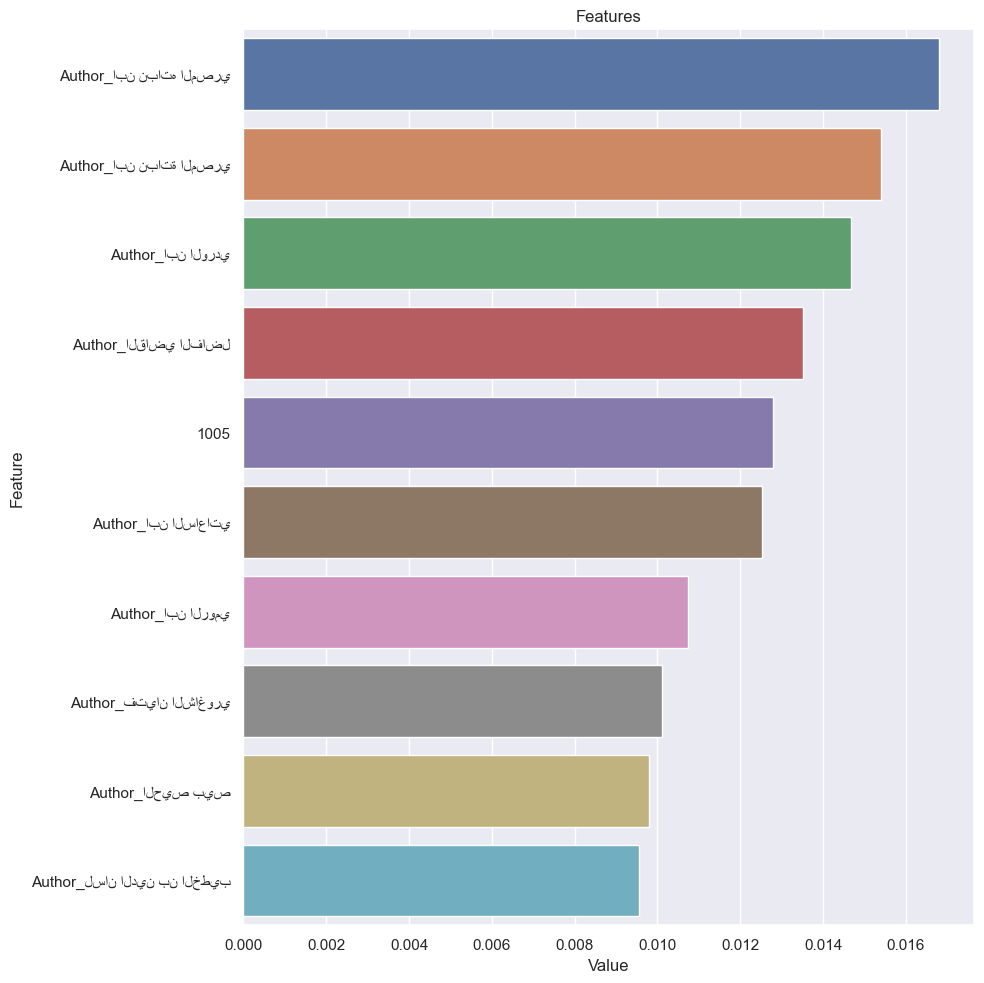

In [548]:
def plot_importance(model, features, num=len(X_train), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(model, X_train, num=10)

## submession

In [549]:
# X_submession = X_submession.drop(["Category", "ID"], axis=1)

In [550]:
columns_with_nan = X_submession.columns[X_submession.isna().any()].tolist()

In [551]:
columns_with_nan

[]

In [552]:
X.shape

(25000, 5791)

In [553]:
X_submession.shape

(4887, 5791)

In [554]:
# تحديد الأعمدة الفارغة في X_submession مقارنة ب X
additional_feature = set(X_submession.columns) - set(X.columns)

# عرض اسم الميزة الإضافية
print("Additional feature:", additional_feature)

Additional feature: set()


In [555]:
y_submession = model.predict(X_submession)

In [556]:
submession = pd.DataFrame(y_submession, columns=['labels'])

In [557]:
def to_categ(x):
    if x==0:
        return "العصر الأندلسي"
    elif x==1:
        return "العصر الايوبي"
    elif x==2:
        return "العصر العباسي"
    elif x==3:
        return "العصر المملوكي"
    elif x==4:
        return "العصر حديث"

In [558]:
submession["Category"] = submession["labels"].apply(to_categ)

In [559]:
submession.head()

,labels,Category
0,4,العصر حديث
1,4,العصر حديث
2,4,العصر حديث
3,2,العصر العباسي
4,2,العصر العباسي


In [560]:
submession["ID"] = submession.index+1

In [561]:
submession.shape

(4887, 3)

In [562]:
submession.head()

,labels,Category,ID
0,4,العصر حديث,1
1,4,العصر حديث,2
2,4,العصر حديث,3
3,2,العصر العباسي,4
4,2,العصر العباسي,5


In [563]:
submession = submession.drop("labels", axis=1)

In [564]:
submession.to_csv("Peom_arabic_submession.csv", index=False)

In [565]:
submession_file = pd.read_csv("Peom_arabic_submession.csv")

In [566]:
submession_file.head()

,Category,ID
0,العصر حديث,1
1,العصر حديث,2
2,العصر حديث,3
3,العصر العباسي,4
4,العصر العباسي,5
